In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id='1Ap3pmeSdgQUEHXaNcUB3kxGZVTwjXHY8'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [4]:
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')
train_labels.tail()

,damage_grade
building_id,
688636,2
669485,3
602512,3
151409,2
747594,3


In [5]:
id='1EBZj8ChDcTigwwL7E7FPLGqYmvNGAanY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

In [6]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train_values.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [8]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

#Feature engineering

In [9]:
train_values.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

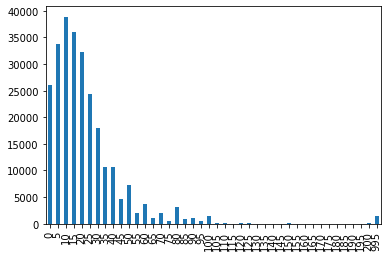

In [10]:
train_values.age.value_counts().sort_index().plot.bar()

In [11]:
train_values['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [12]:
train_values['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [13]:
train_values[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                     'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                     'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered',\
                     'has_superstructure_other']].sum()

has_superstructure_adobe_mud               23101
has_superstructure_mud_mortar_stone       198561
has_superstructure_stone_flag               8947
has_superstructure_cement_mortar_stone      4752
has_superstructure_mud_mortar_brick        17761
has_superstructure_cement_mortar_brick     19615
has_superstructure_timber                  66450
has_superstructure_bamboo                  22154
has_superstructure_rc_non_engineered       11099
has_superstructure_rc_engineered            4133
has_superstructure_other                    3905
dtype: int64

In [14]:
train_values['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [15]:
train_values_subset = train_values

In [16]:
train_values_subset = pd.get_dummies(train_values_subset)

In [17]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


##Agregamos columnas


Verificamos que no haya edificios duplicados y nulos

In [18]:
train_values_subset.reset_index()['building_id'].drop_duplicates()

0         802906
1          28830
2          94947
3         590882
4         201944
           ...  
260596    688636
260597    669485
260598    602512
260599    151409
260600    747594
Name: building_id, Length: 260601, dtype: int64

In [19]:
train_values_subset.dropna()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [20]:
train_values_subset['volumen'] = train_values_subset['area_percentage']*train_values_subset['height_percentage']

In [21]:
train_values.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [22]:
train_values_subset['combinacion_materiales']=train_values_subset.iloc[:,7:18].sum(axis=1)

In [23]:
train_values_subset.sum()

geo_level_1_id                 3622446
geo_level_2_id               182700764
geo_level_3_id              1630808782
count_floors_pre_eq             555008
age                            6915055
                               ...    
legal_ownership_status_r          1473
legal_ownership_status_v        250939
legal_ownership_status_w          2677
volumen                       11786975
combinacion_materiales          380478
Length: 70, dtype: int64

In [24]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1
669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1
602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1


In [25]:
train_values_subset['combinacion_usos'] = train_values['has_secondary_use_agriculture']+\
train_values['has_secondary_use_hotel']+train_values['has_secondary_use_rental']+train_values['has_secondary_use_institution']+\
train_values['has_secondary_use_school']+train_values['has_secondary_use_industry']+\
train_values['has_secondary_use_health_post']+train_values['has_secondary_use_gov_office']+\
train_values['has_secondary_use_use_police']+train_values['has_secondary_use_other']

In [26]:
train_values_subset['area/altura'] = train_values_subset['area_percentage']/train_values_subset['height_percentage']

In [27]:
train_values_subset['combinacion_usos'].sum()

29713

In [28]:
train_values_subset['antiguedad_material'] = train_values_subset['age']*train_values_subset['has_superstructure_mud_mortar_stone']

In [29]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2,0,1.200000,30
28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,10
94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,1.000000,10
590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3,0,1.200000,10
201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1,0,0.888889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1,0,2.000000,55
669485,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1,0,1.200000,0
602512,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,0.857143,55


#Mas Features

In [30]:
p1 = train_values_subset.groupby(['geo_level_1_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p1.reset_index(),suffixes=["","_geo_level_1"], how='left', on=['geo_level_1_id'])

In [31]:
p2 = train_values_subset.groupby(['geo_level_2_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p2.reset_index(),suffixes=["","_geo_level_2"], how='left', on=['geo_level_2_id'])

In [32]:
p3 = train_values_subset.groupby(['geo_level_3_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p3.reset_index(),suffixes=["","_geo_level_3"], how='left', on=['geo_level_3_id'])

In [33]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3,0,1.200000,10,0.889155,0.970732,0.903226
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,84,1,0,2.333333,0,0.460049,0.039624,0.076271


In [34]:
a1 = train_values_subset.groupby(['geo_level_1_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [35]:
train_values_subset['age_geo_level_id1'].value_counts()

15    129748
20     55331
10     43789
30     28292
25      3441
Name: age_geo_level_id1, dtype: int64

In [36]:
a2 = train_values_subset.groupby(['geo_level_2_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [37]:
train_values_subset['age_geo_level_id2'].value_counts()

15.0     91064
20.0     68530
10.0     45996
25.0     27556
5.0       6287
60.0      5827
30.0      4357
35.0      3589
45.0      1958
22.5      1694
17.5      1284
12.5       658
40.0       340
27.5       290
32.5       242
995.0      205
50.0       185
80.0       173
47.5       110
55.0        75
0.0         57
95.0        49
37.5        38
42.5        34
7.5          2
100.0        1
Name: age_geo_level_id2, dtype: int64

In [38]:
a3 = train_values_subset.groupby(['geo_level_3_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [39]:
train_values_subset['age_geo_level_id3'].value_counts()

15.0     65336
20.0     55131
10.0     49929
25.0     27351
5.0      13091
30.0     11125
17.5      6908
12.5      5264
22.5      4030
35.0      3565
40.0      2396
27.5      2186
7.5       1846
50.0      1779
45.0      1471
80.0      1187
60.0      1120
32.5      1040
90.0       908
995.0      606
37.5       576
100.0      536
42.5       428
75.0       395
55.0       393
65.0       334
0.0        311
85.0       292
70.0       250
62.5       194
52.5       188
47.5       140
95.0       137
57.5        62
2.5         34
550.0        8
200.0        7
72.5         6
82.5         6
67.5         6
500.0        4
532.5        4
105.0        3
502.5        2
497.5        2
545.0        2
102.5        2
522.5        2
507.5        2
77.5         2
515.0        2
510.0        2
Name: age_geo_level_id3, dtype: int64

In [40]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,84,1,0,2.333333,0,0.460049,0.039624,0.076271,10,10.0,15.0


In [41]:
v1 = train_values_subset.groupby(['geo_level_1_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [42]:
v2 = train_values_subset.groupby(['geo_level_2_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [43]:
v3 = train_values_subset.groupby(['geo_level_3_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [44]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3,volumen_geo_level_id1,volumen_geo_level_id2,volumen_geo_level_id3
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0,45.0,36.0,35.0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0,36.0,36.0,56.0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0,36.0,42.0,58.5
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,3,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0,35.0,15.0,40.0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0,49.0,48.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5,33.0,21.0,24.0
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0,40.0,48.0,56.0
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0,40.0,35.0,37.5
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,.

#XGBoost default

In [45]:
import xgboost as xgb

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_values_subset, train_labels, test_size=0.3, random_state=45)

In [48]:
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

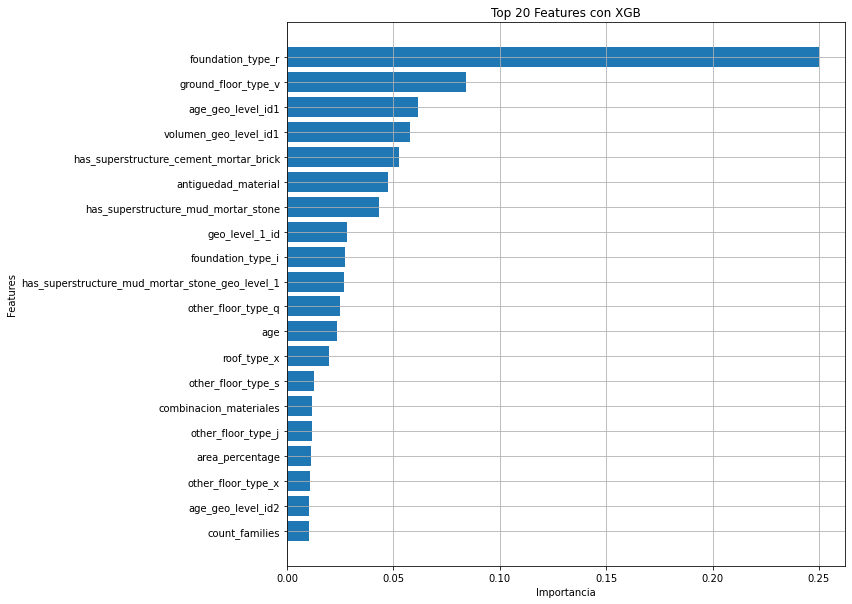

In [64]:
sorted_idx = xg.feature_importances_.argsort()
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx][62:82], xg.feature_importances_[sorted_idx][62:82])
#plt.xticks(rotation=90)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Top 20 Features con XGB')
plt.grid(True)
plt.show()

In [53]:
from sklearn.metrics import f1_score

preds = xg.predict(X_test)
f1_score(y_test, preds, average='micro')

0.6810734065821619

#XGBoost con Random search

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_values_subset, train_labels, test_size=0.3, random_state=45)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
params = {'max_depth': [6, 10, 15, 20],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
          'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
          'gamma': [0, 0.25, 0.5, 1.0],
          'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        ' n_estimators': [100]}
xgb_clf = xgb.XGBClassifier()
cb_model = RandomizedSearchCV(xgb_clf, params, scoring="f1_micro", cv=5)
cb_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                   

In [ ]:
cb_model.best_score_

0.7479114132222343

In [ ]:
cb_model.best_params_

{' n_estimators': 100,
 'colsample_bylevel': 0.6,
 'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.2,
 'max_depth': 20,
 'min_child_weight': 0.5,
 'reg_lambda': 50.0,
 'subsample': 0.6}

In [65]:
#Entreno con los mejores hiper parametros
xg_rs = xgb.XGBClassifier(n_estimators=100,colsample_bylevel=0.6,colsample_bytree=0.5,gamma=0,learning_rate=0.2,max_depth=20,
                       min_child_weight=0.5,reg_lambda=50,subsample=0.6)
xg_rs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=0.5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=50, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

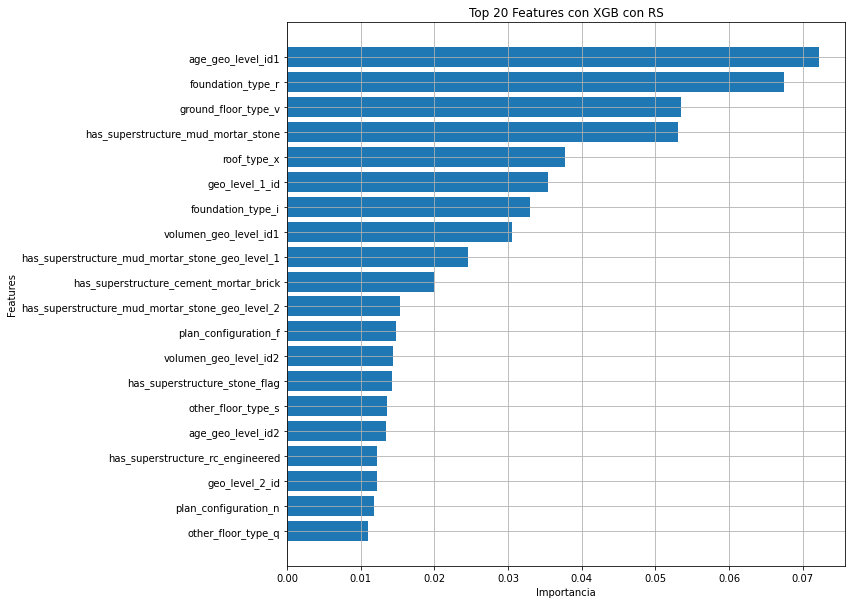

In [67]:
sorted_idx = xg_rs.feature_importances_.argsort()
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx][62:82], xg_rs.feature_importances_[sorted_idx][62:82])
#plt.xticks(rotation=90)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Top 20 Features con XGB con RS')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

preds = xg_rs.predict(X_test)
f1_score(y_test, preds, average='micro')

0.7482764354510687

En driven: 0,7259

#Entrega

In [ ]:
id='1GkhS3TIJdxEbdn2bfA9KMaK5t4KbkWzz'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_values.csv')

In [ ]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')
test_values.tail()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
442785,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0
501372,26,36,6436,2,10,11,4,t,r,q,v,q,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_values_subset=test_values
test_values_subset = pd.get_dummies(test_values_subset)
test_values_subset['volumen'] = test_values_subset['area_percentage']*test_values_subset['height_percentage']
test_values_subset['combinacion_materiales']=test_values_subset.iloc[:,7:18].sum(axis=1)

In [ ]:
test_values.sum()

geo_level_1_id                                                                      1206440
geo_level_2_id                                                                     61166202
geo_level_3_id                                                                    543946443
count_floors_pre_eq                                                                  185302
age                                                                                 2306360
area_percentage                                                                      696152
height_percentage                                                                    472223
land_surface_condition                    ttttttnttntttntttttttttntntnttntttttttttttottt...
foundation_type                           rrrrrrrrrrwrrrrrrrurrrrrrrrrurrwrrrrrrrrrrrrrh...
roof_type                                 nnnxqqnnnnqnnnxnnnnnnnnnxnnqnqnnnnnnnqnnnnnnnn...
ground_floor_type                         fffvffvffffvffvffffffxffvfffvfffffffff

In [ ]:
test_values_subset['combinacion_usos'] = test_values['has_secondary_use_agriculture']+\
test_values['has_secondary_use_hotel']+test_values['has_secondary_use_rental']+test_values['has_secondary_use_institution']+\
test_values['has_secondary_use_school']+test_values['has_secondary_use_industry']+\
test_values['has_secondary_use_health_post']+test_values['has_secondary_use_gov_office']+\
test_values['has_secondary_use_use_police']+test_values['has_secondary_use_other']

In [ ]:
test_values_subset['area/altura'] = test_values_subset['area_percentage']/test_values_subset['height_percentage']

In [ ]:
test_values_subset['antiguedad_material'] = test_values_subset['age']*test_values_subset['has_superstructure_mud_mortar_stone']

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,1.166667,20
99355,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,65,1,1,2.600000,25
890251,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,20,1,0,0.800000,5
745817,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,57,1,1,6.333333,0
421793,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,120,2,1,3.333333,70
663567,10,1407,11907,3,25,6,7,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,3,0,0.857143,25
1049160,22,1136,7712,1,50,3,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,9,2,0,1.000000,50


In [ ]:
p1 = test_values_subset.groupby(['geo_level_1_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p1.reset_index(),suffixes=["","_geo_level_1"], how='left', on=['geo_level_1_id'])

In [ ]:
p2 = test_values_subset.groupby(['geo_level_2_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p2.reset_index(),suffixes=["","_geo_level_2"], how='left', on=['geo_level_2_id'])

In [ ]:
p3 = test_values_subset.groupby(['geo_level_3_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p3.reset_index(),suffixes=["","_geo_level_3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3
0,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000
1,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000
2,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000
3,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,57,1,1,6.333333,0,0.455801,0.039880,0.010526
4,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,120,2,1,3.333333,70,0.978545,0.989583,1.000000
86864,10,1407,11907,3,25,6,7,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000
86865,22,1136,7712,1,50,3,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,9,2,0,1.000000,50,0.892688,0.868852,1.000000
86866,6,1041,912,2,5,9,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,45,2,0,1.800000,5,0.744447,0.876190,0.906250


In [ ]:
a1 = test_values_subset.groupby(['geo_level_1_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
test_values_subset['age_geo_level_id1'].value_counts()

15    43692
20    17505
10    14187
30     9384
25     2100
Name: age_geo_level_id1, dtype: int64

In [ ]:
a2 = test_values_subset.groupby(['geo_level_2_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
test_values_subset['age_geo_level_id2'].value_counts()

15.0     28204
20.0     21724
10.0     15537
25.0      7952
30.0      3413
5.0       2638
22.5      1346
60.0      1177
17.5       914
12.5       832
35.0       774
65.0       732
50.0       421
45.0       360
27.5       278
40.0       154
995.0      110
7.5        100
32.5        72
37.5        34
85.0        24
47.5        22
42.5        18
52.5        12
55.0         7
70.0         4
0.0          4
62.5         2
80.0         2
95.0         1
Name: age_geo_level_id2, dtype: int64

In [ ]:
a3 = test_values_subset.groupby(['geo_level_3_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset['age_geo_level_id3'].value_counts()

15.0     17545
10.0     15619
20.0     15175
25.0      8248
5.0       5928
30.0      4047
12.5      3398
17.5      3392
22.5      2246
35.0      1662
27.5      1418
7.5       1388
40.0      1090
50.0       633
45.0       578
32.5       574
80.0       468
0.0        366
37.5       338
60.0       329
100.0      320
55.0       237
47.5       232
995.0      216
42.5       210
2.5        202
90.0       183
65.0       170
70.0       164
85.0       164
52.5        74
95.0        59
75.0        53
57.5        36
67.5        20
120.0       14
517.5       10
62.5        10
512.5        8
507.5        8
505.0        6
510.0        6
77.5         6
72.5         4
200.0        3
500.0        2
117.5        2
502.5        2
145.0        2
110.0        1
180.0        1
105.0        1
Name: age_geo_level_id3, dtype: int64

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3
0,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000,15,20.0,35.0
1,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000,20,15.0,40.0
2,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000,20,20.0,7.5
3,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,57,1,1,6.333333,0,0.455801,0.039880,0.010526,10,10.0,10.0
4,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000,15,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,120,2,1,3.333333,70,0.978545,0.989583,1.000000,15,15.0,37.5
86864,10,1407,11907,3,25,6,7,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000,15,15.0,25.0
86865,22,1136,7712,1,50,3,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,9,2,0,1.000000,50,0.892688,0.868852,1.000000,20,20.0,30.0
86866,6,1041,912,2,5,9,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,45,2,0,1.800000,5,0.744447,0.876190,0.906250,20,15.0,15.0


In [ ]:
v1 = test_values_subset.groupby(['geo_level_1_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
v2 = test_values_subset.groupby(['geo_level_2_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
v3 = test_values_subset.groupby(['geo_level_3_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset.sum()

geo_level_1_id             1206440.0
geo_level_2_id            61166202.0
geo_level_3_id           543946443.0
count_floors_pre_eq         185302.0
age                        2306360.0
                            ...     
age_geo_level_id2          1699655.0
age_geo_level_id3          1906070.0
volumen_geo_level_id1      3283381.0
volumen_geo_level_id2      3434216.0
volumen_geo_level_id3      3590002.0
Length: 82, dtype: float64

In [ ]:
predictions = xg_rs.predict(test_values_subset)

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3,volumen_geo_level_id1,volumen_geo_level_id2,volumen_geo_level_id3,count_floors_pre_eq_geo_level_id1,count_floors_pre_eq_geo_level_id2,count_floors_pre_eq_geo_level_id3,area_percentage_geo_level_id1,area_percentage_geo_level_id2,area_percentage_geo_level_id3,height_percentage_geo_level_id1,height_percentage_geo_level_id2,height_percentage_geo_level_id3
0,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000,15,20.0,35.0,40.0,48.0,45.0,2,3.0,3.0,7,8.0,7.5,6.0,6.0,6.0
1,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000,20,15.0,40.0,45.0,42.0,35.0,2,2.0,2.0,8,8.0,7.0,6.0,5.0,5.0
2,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000,20,20.0,7.5,35.0,20.0,32.5,2,2.0,2.0,8,4.0,6.5,5.0,5.0,5.0
3,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,57,1,1,6.333333,0,0.455801,0.039880,0.010526,10,10.0,10.0,35.0,51.0,94.5,2,1.0,2.0,7,14.0,18.0,5.0,3.0,6.0
4,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000,15,20.0,15.0,40.0,49.0,56.0,2,2.0,3.0,7,7.0,8.0,6.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,120,2,1,3.333333,70,0.978545,0.989583,1.000000,15,15.0,37.5,32.0,36.0,104.0,2,3.0,2.5,6,7.0,16.0,5.0,6.0,6.0
86864,10,1407,11907,3,25,6,7,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000,15,15.0,25.0,30.0,28.0,42.0,2,2.0,3.0,6,6.0,6.0,5.0,5.0,7.0
86865,22,1136,7712,1,50,3,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,..

In [ ]:
id='1m7BvONaXhc0stbfuOklP-JGpVND9AGVf'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('submission_format.csv')

In [ ]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
submission_format.tail()

,damage_grade
building_id,
310028,1
663567,1
1049160,1
442785,1
501372,1


In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,2
421793,3


In [ ]:
my_submission.to_csv('submission.csv')